# TASK - 3

# SALES PREDICTION

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
Sales_prid = pd.read_csv("C:\\Users\\Arti Rajawat\\Downloads\\advertising.csv")
Sales_prid.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
Sales_prid.shape

(200, 4)

In [5]:
Sales_prid.describe(include='all')

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
Sales_prid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
Sales_prid.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [8]:
Sales_prid.duplicated().sum()

0

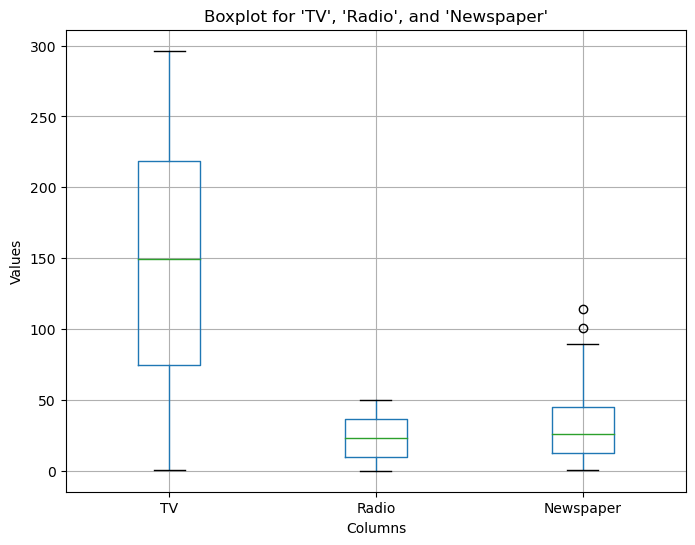

In [9]:
# Create a boxplot for the columns 'TV', 'Radio', and 'Newspaper'
plt.figure(figsize=(8, 6))
Sales_prid.boxplot(column=['TV', 'Radio', 'Newspaper'])
plt.title("Boxplot for 'TV', 'Radio', and 'Newspaper'")
plt.ylabel("Values")
plt.xlabel("Columns")
plt.show()


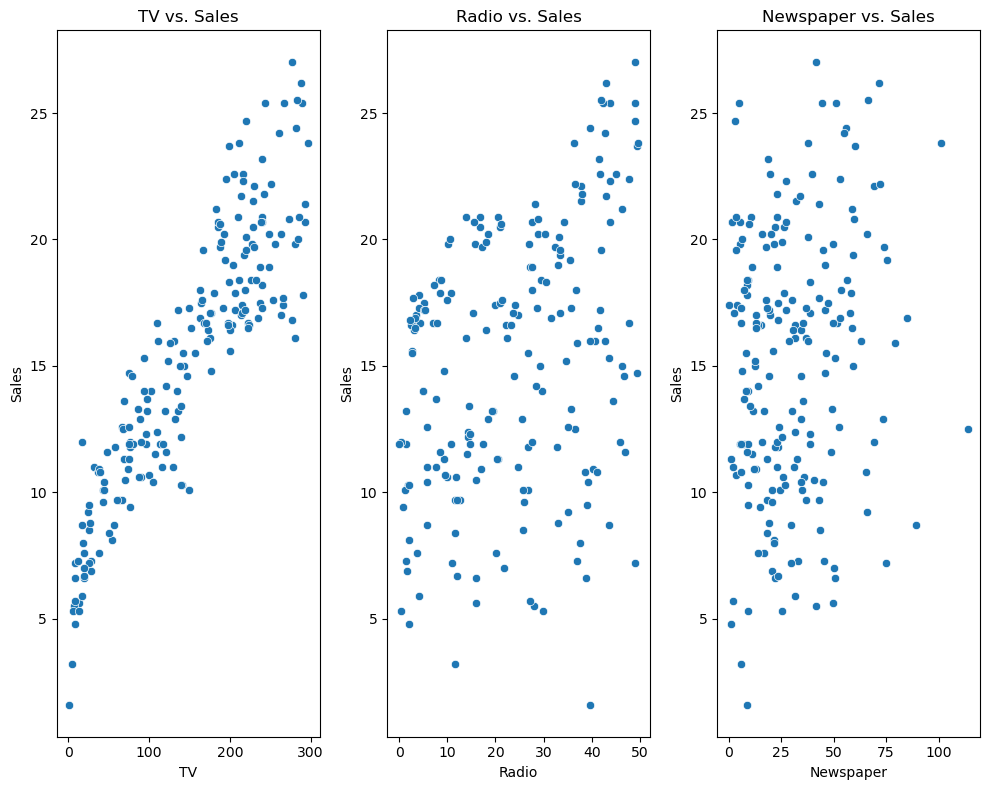

In [10]:

# Create individual graphs for each column against 'Sales' using Seaborn
plt.figure(figsize=(10, 8))

# TV vs. Sales
plt.subplot(1, 3, 1)
sns.scatterplot(x='TV', y='Sales', data=Sales_prid)
plt.title("TV vs. Sales")

# Radio vs. Sales
plt.subplot(1, 3, 2)
sns.scatterplot(x='Radio', y='Sales', data=Sales_prid)
plt.title("Radio vs. Sales")

# Newspaper vs. Sales
plt.subplot(1, 3, 3)
sns.scatterplot(x='Newspaper', y='Sales', data=Sales_prid)
plt.title("Newspaper vs. Sales")

plt.tight_layout()
plt.show()


In [12]:
from pycaret.regression import*

reg_setup = setup(data=Sales_prid,target='Sales',session_id=123)
best_model=compare_models()
print(best_model)

,Description,Value
0,Session id,123
1,Target,Sales
2,Target type,Regression
3,Original data shape,"(200, 4)"
4,Transformed data shape,"(200, 4)"
5,Transformed train set shape,"(140, 4)"
6,Transformed test set shape,"(60, 4)"
7,Numeric features,3
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.8101,1.1968,1.0709,0.9543,0.0929,0.0771,5.0560
rf,Random Forest Regressor,0.9379,1.6216,1.2355,0.9381,0.1069,0.0899,4.7780
gbr,Gradient Boosting Regressor,0.9616,1.6720,1.2445,0.9377,0.1088,0.0926,5.0490
ada,AdaBoost Regressor,1.2241,2.3662,1.4917,0.9109,0.1253,0.1152,4.5750
dt,Decision Tree Regressor,1.1857,2.6043,1.5659,0.9043,0.1279,0.1099,4.9040
knn,K Neighbors Regressor,1.2737,2.5592,1.5748,0.9004,0.1202,0.1119,3.9150
lasso,Lasso Regression,1.2247,2.6154,1.5644,0.8991,0.1359,0.1235,4.0830
llar,Lasso Least Angle Regression,1.2247,2.6154,1.5644,0.8991,0.1359,0.1235,3.0600
en,Elastic Net,1.2251,2.6298,1.5672,0.8985,0.1366,0.1240,3.2360
lar,Least Angle Regression,1.2270,2.6435,1.5693,0.8980,0.1373,0.1248,3.4580


Processing:   0%|          | 0/77 [00:00<?, ?it/s]

ExtraTreesRegressor(n_jobs=-1, random_state=123)


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [14]:
# Separate the features (X) and target (y) variables
X = Sales_prid[['TV', 'Radio', 'Newspaper']]
y = Sales_prid['Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Train a Random Forest Regression model
random_forest_reg = RandomForestRegressor(random_state=42)
random_forest_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred_linear = linear_reg.predict(X_test)
y_pred_rf = random_forest_reg.predict(X_test)

# Evaluate the models
linear_reg_mse = mean_squared_error(y_test, y_pred_linear)
random_forest_mse = mean_squared_error(y_test, y_pred_rf)

linear_reg_r2 = r2_score(y_test, y_pred_linear)
random_forest_r2 = r2_score(y_test, y_pred_rf)

print(f"Linear Regression Mean Squared Error: {linear_reg_mse:.2f}")
print(f"Random Forest Mean Squared Error: {random_forest_mse:.2f}")

print(f"Linear Regression R^2 Score: {linear_reg_r2:.2f}")
print(f"Random Forest R^2 Score: {random_forest_r2:.2f}")


Linear Regression Mean Squared Error: 2.91
Random Forest Mean Squared Error: 1.44
Linear Regression R^2 Score: 0.91
Random Forest R^2 Score: 0.95


### Separate the features (X) and target (y) variables and train the model using Random Forest

In [15]:

X = Sales_prid[['TV', 'Radio', 'Newspaper']]
y = Sales_prid['Sales']

# Train the Random Forest Regression model on the dataset
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X, y)


RandomForestRegressor(random_state=42)

## Create a sample data to predict the sales

In [16]:

# Assuming you have new data to predict 'Sales'
# Here's an example of a new set of input features
new_data = pd.DataFrame({
    'TV': [250.0, 260.0, 213.5, 7.8, 44.7],
    'Radio': [30.0, 37.5, 29.1, 53.3, 25.0],
    'Newspaper': [40.0, 50.6, 47.2, 41.8, 20.0]
})


In [17]:
# Make predictions on the new set of input features
predictions = rf_model.predict(new_data)

# Print the predictions
print("Predicted Sales:")
print(predictions)


Predicted Sales:
[20.021 23.147 18.181  6.395  9.62 ]


### This is the predictions sales which is predicted my model.